<a href="https://colab.research.google.com/drive/1A-RRuYbrH-69fO6W3BcPvdbRVTO8iTdP?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardio Good Fitness Case Study
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness.

The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics.

The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months.

The data are stored in the CardioGoodFitness.csv file

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=8191ae13072d2937f9fac4ffe24e1151e7472d8cebc875b1dd147784393a9cf2
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Spark session
spark = SparkSession.builder.appName("CardioAnalysis").getOrCreate()

# Read the dataset using PySpark
path = "./CardioGoodFitness.csv"
cardio_data = spark.read.csv(path, header=True, inferSchema=True)

# Register the DataFrame as a temporary SQL table
cardio_data.createOrReplaceTempView("cardio_data")


In [5]:
cardio_data.show()

+-------+---+------+---------+-------------+-----+-------+------+-----+
|Product|Age|Gender|Education|MaritalStatus|Usage|Fitness|Income|Miles|
+-------+---+------+---------+-------------+-----+-------+------+-----+
|  TM195| 18|  Male|       14|       Single|    3|      4| 29562|  112|
|  TM195| 19|  Male|       15|       Single|    2|      3| 31836|   75|
|  TM195| 19|Female|       14|    Partnered|    4|      3| 30699|   66|
|  TM195| 19|  Male|       12|       Single|    3|      3| 32973|   85|
|  TM195| 20|  Male|       13|    Partnered|    4|      2| 35247|   47|
|  TM195| 20|Female|       14|    Partnered|    3|      3| 32973|   66|
|  TM195| 21|Female|       14|    Partnered|    3|      3| 35247|   75|
|  TM195| 21|  Male|       13|       Single|    3|      3| 32973|   85|
|  TM195| 21|  Male|       15|       Single|    5|      4| 35247|  141|
|  TM195| 21|Female|       15|    Partnered|    2|      3| 37521|   85|
|  TM195| 22|  Male|       14|       Single|    3|      3| 36384

In [6]:

# General summary using Spark SQL
def general_summary_sql():
    print("The first five lines of the dataset")
    spark.sql("SELECT * FROM cardio_data LIMIT 5").show()
    print("The descriptive statistics of the CardioGoodFitness dataset")
    spark.sql("SELECT * FROM cardio_data").describe().show()
    print("The schema of the CardioGoodFitness dataset")
    spark.sql("DESCRIBE cardio_data").show()
    print("The shape of the CardioGoodFitness dataset")
    spark.sql("SELECT COUNT(*) AS row_count, COUNT(*) AS column_count FROM cardio_data").show()

general_summary_sql()


The first five lines of the dataset
+-------+---+------+---------+-------------+-----+-------+------+-----+
|Product|Age|Gender|Education|MaritalStatus|Usage|Fitness|Income|Miles|
+-------+---+------+---------+-------------+-----+-------+------+-----+
|  TM195| 18|  Male|       14|       Single|    3|      4| 29562|  112|
|  TM195| 19|  Male|       15|       Single|    2|      3| 31836|   75|
|  TM195| 19|Female|       14|    Partnered|    4|      3| 30699|   66|
|  TM195| 19|  Male|       12|       Single|    3|      3| 32973|   85|
|  TM195| 20|  Male|       13|    Partnered|    4|      2| 35247|   47|
+-------+---+------+---------+-------------+-----+-------+------+-----+

The descriptive statistics of the CardioGoodFitness dataset
+-------+-------+------------------+------+------------------+-------------+------------------+------------------+-----------------+------------------+
|summary|Product|               Age|Gender|         Education|MaritalStatus|             Usage|        

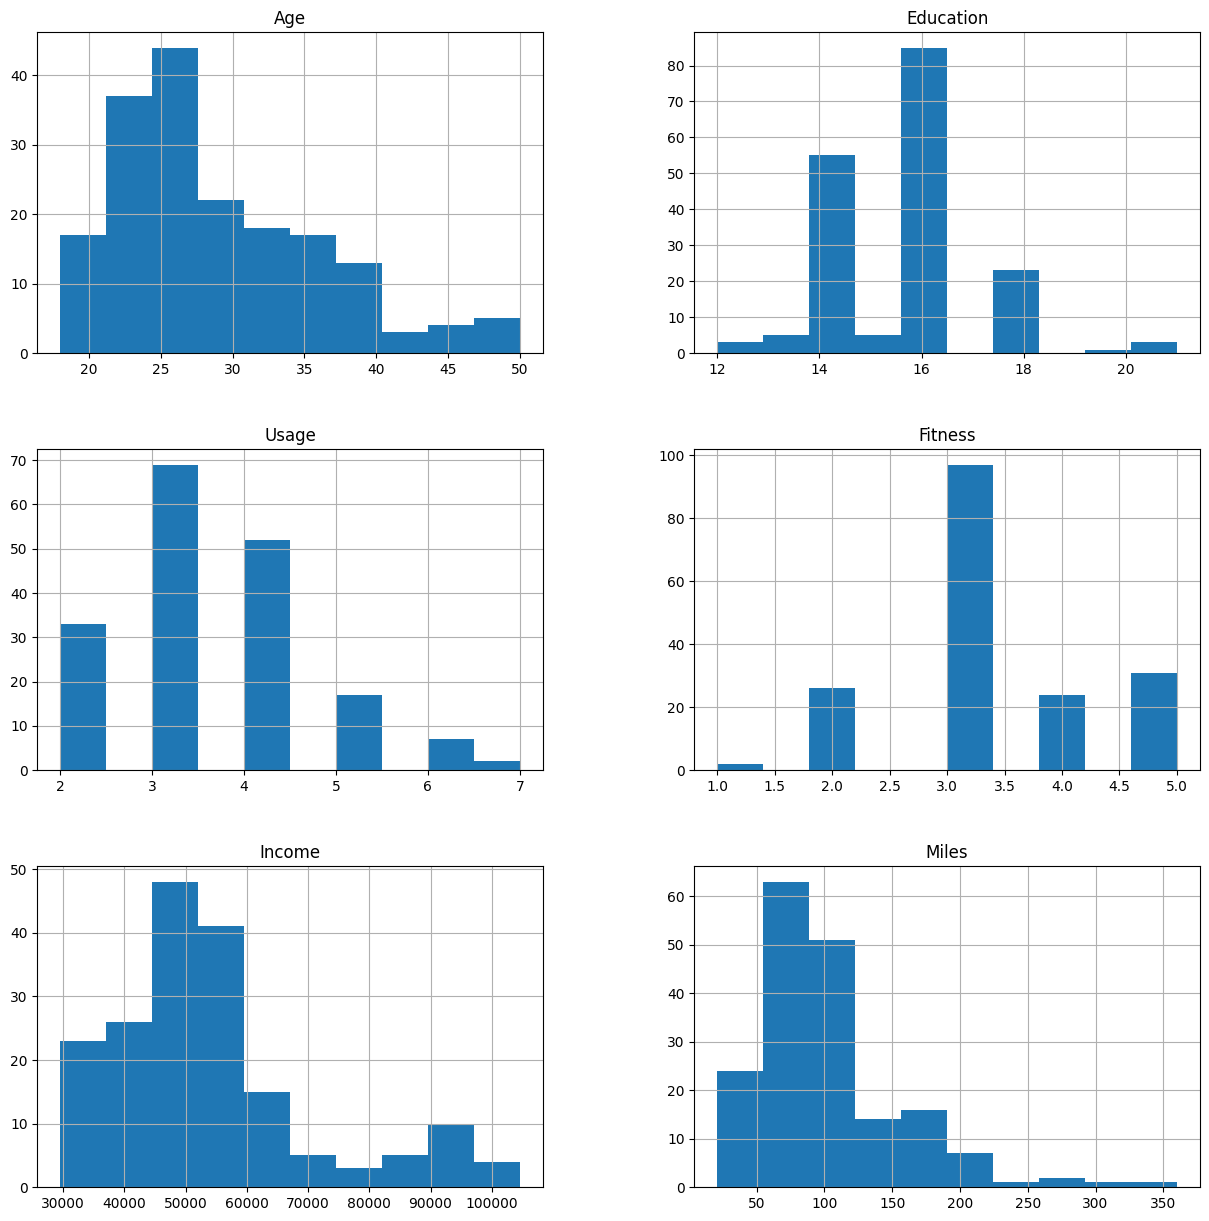

In [7]:

# Plot histogram
def plot_histogram(cardio_data):
    cardio_data.toPandas().hist(figsize=(15, 15))
    plt.show()

plot_histogram(cardio_data)


In [12]:
# Stop the Spark session
spark.stop()

# **Use large scale dataset example -- California housing data**

In [25]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("BigDataAnalysis").getOrCreate()
data = spark.read.csv("/content/sample_data/california_housing_train.csv", header=True, inferSchema=True)


In [26]:
data.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

data summary

In [27]:
data.describe().show()


+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|      total_rooms|   total_bedrooms|        population|       households|     median_income|median_house_value|
+-------+-------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|              17000|             17000|             17000|            17000|            17000|             17000|            17000|             17000|             17000|
|   mean|-119.56210823529375|  35.6252247058827| 28.58935294117647|2643.664411764706|539.4108235294118|1429.5739411764705|501.2219411764706| 3.883578100000021|207300.91235294117|
| stddev| 2.0051664084260357|2.1373397946570867|12.586936981660406|2179.947071452777|421.4994515798648| 1

Filter data

In [28]:
filtered_data = data.filter(data['median_house_value'] > 100000)
filtered_data.show()


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -115.39|   32.76|              16.0|     1136.0|         196.0|     481.0|     185.0|       6.2558|          146300.0|
|   -115.4|   32.86|              19.0|     1087.0|         171.0|     649.0|     173.0|       3.3182|          113800.0|
|  -115.41|   32.99|              29.0|     1141.0|         220.0|     684.0|     194.0|       3.4038|          107800.0|
|  -115.49|   32.87|              19.0|      541.0|         104.0|     457.0|     106.0|       3.3583|          102800.0|
|   -115.5|   32.75|              13.0|      330.0|          72.0|     822.0|      64.0|       3.4107|          142500.0|
|  -115.55|   32.98|    

aggregate data

In [29]:
from pyspark.sql import functions as F
agg_result = data.groupBy('total_bedrooms').agg(
    F.avg('median_house_value').alias('avg_median_house_value'),
    F.max('population').alias('max_population')
)
agg_result.show()


+--------------+----------------------+--------------+
|total_bedrooms|avg_median_house_value|max_population|
+--------------+----------------------+--------------+
|         496.0|    187011.53846153847|        2160.0|
|         692.0|              217000.0|        2418.0|
|         596.0|    234675.08333333334|        3490.0|
|        1051.0|              204500.0|        3439.0|
|         558.0|    213478.64285714287|        2164.0|
|         305.0|    218914.33333333334|        1359.0|
|         299.0|     210773.1923076923|        1272.0|
|         769.0|    224142.85714285713|        2519.0|
|         934.0|    233328.57142857142|        3795.0|
|        2862.0|              315600.0|        9427.0|
|        1761.0|              168800.0|        5278.0|
|         782.0|              130800.0|        3260.0|
|         810.0|    205944.55555555556|        3041.0|
|         147.0|    163470.64705882352|         653.0|
|         184.0|    207331.63157894736|         788.0|
|         

Data Visulation

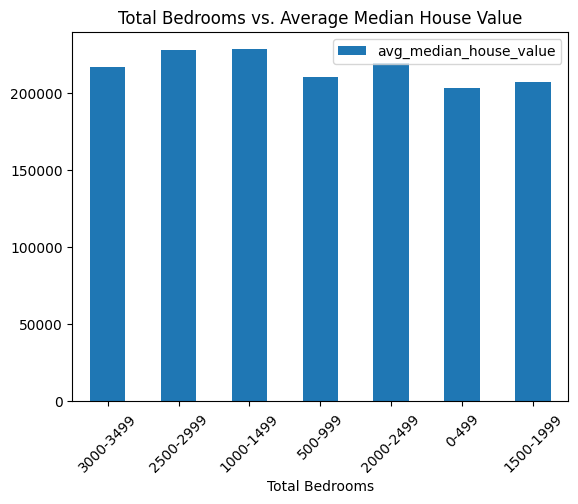

In [35]:
# Define the bin ranges and labels
bin_ranges = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
bin_labels = ['0-499', '500-999', '1000-1499', '1500-1999', '2000-2499', '2500-2999', '3000-3499']

# Create the 'bedroom_bin' column based on the binning logic
data = data.withColumn('bedroom_bin', F.when((F.col('total_bedrooms') >= bin_ranges[0]) & (F.col('total_bedrooms') <= bin_ranges[1]), bin_labels[0])
                    .when((F.col('total_bedrooms') >= bin_ranges[1]) & (F.col('total_bedrooms') <= bin_ranges[2]), bin_labels[1])
                    .when((F.col('total_bedrooms') >= bin_ranges[2]) & (F.col('total_bedrooms') <= bin_ranges[3]), bin_labels[2])
                    .when((F.col('total_bedrooms') >= bin_ranges[3]) & (F.col('total_bedrooms') <= bin_ranges[4]), bin_labels[3])
                    .when((F.col('total_bedrooms') >= bin_ranges[4]) & (F.col('total_bedrooms') <= bin_ranges[5]), bin_labels[4])
                    .when((F.col('total_bedrooms') >= bin_ranges[5]) & (F.col('total_bedrooms') <= bin_ranges[6]), bin_labels[5])
                    .when((F.col('total_bedrooms') >= bin_ranges[6]), bin_labels[6])
                    .otherwise('Other'))

# Group by 'bedroom_bin' and calculate the average median house value
agg_result = data.groupBy('bedroom_bin').agg(
    F.avg('median_house_value').alias('avg_median_house_value')
)
# Plot the bar chart
agg_result.toPandas().plot(kind='bar', x='bedroom_bin', y='avg_median_house_value')
plt.title('Total Bedrooms vs. Average Median House Value')
plt.xlabel('Total Bedrooms')
plt.xticks(rotation=45)
plt.show()
